# Transfer Learning Fine tuning

In [ ]:
!nvidia-smi

Wed Jun 29 14:25:03 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2022-06-29 14:25:04--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-06-29 14:25:07 (91.1 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
from helper_functions import *

## Let's Get some data

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

--2022-06-29 14:25:10--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.135.128, 74.125.142.128, 74.125.195.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.135.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   185MB/s    in 0.9s    

2022-06-29 14:25:11 (185 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [ ]:
unzip_data("10_food_classes_10_percent.zip")

In [ ]:
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ch

In [ ]:
train_dir = "10_food_classes_10_percent/train"
test_dir = "10_food_classes_10_percent/test"

In [ ]:
import tensorflow as tf

In [ ]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                            image_size=IMG_SIZE,
                                                                            label_mode="categorical",
                                                                            batch_size=BATCH_SIZE)
test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                image_size=IMG_SIZE,
                                                                label_mode="categorical",
                                                                batch_size=BATCH_SIZE)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
for images, labels in train_data_10_percent.take(1):
  print(images, labels)

tf.Tensor(
[[[[2.48705353e+02 2.55000000e+02 2.52000000e+02]
   [2.51174103e+02 2.54941971e+02 2.52000000e+02]
   [2.54763397e+02 2.54000000e+02 2.50473221e+02]
   ...
   [2.49218674e+02 2.37691940e+02 2.00249710e+02]
   [2.48206985e+02 2.38206985e+02 2.03169693e+02]
   [2.49701859e+02 2.40928574e+02 2.07248444e+02]]

  [[2.48705353e+02 2.55000000e+02 2.52000000e+02]
   [2.51174103e+02 2.55000000e+02 2.50000000e+02]
   [2.54763397e+02 2.54236603e+02 2.50000000e+02]
   ...
   [2.51526733e+02 2.40236633e+02 1.98616119e+02]
   [2.49125305e+02 2.40058014e+02 2.01152130e+02]
   [2.50391296e+02 2.42391296e+02 2.05462723e+02]]

  [[2.50000000e+02 2.55000000e+02 2.49785721e+02]
   [2.53058029e+02 2.55000000e+02 2.50000000e+02]
   [2.54763397e+02 2.54236603e+02 2.50000000e+02]
   ...
   [2.53577438e+02 2.43450912e+02 1.96480911e+02]
   [2.49186478e+02 2.40446335e+02 1.96427582e+02]
   [2.50513779e+02 2.43513779e+02 1.99085220e+02]]

  ...

  [[2.22954407e+02 2.07740143e+02 1.89382935e+02]
   [2

## Creating a model using the functional API

In [ ]:
base_model = tf.keras.applications.EfficientNetB0(include_top=False)

base_model.trainable = False

inputs = tf.keras.layers.Input(shape=(224,224,3), name="input_layer")

#If using model like ResNet you will need to normalize
# x = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)
x = base_model(inputs)

x.shape

x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)

x.shape

outputs = tf.keras.layers.Dense(10, activation="softmax", name="output_layer")(x)

model_0 = tf.keras.Model(inputs, outputs)

model_0.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_0 = model_0.fit(train_data_10_percent,
                        steps_per_epoch=len(train_data_10_percent),
                        validation_data=test_data,
                        validation_steps=len(test_data),
                        epochs=5,
                        callbacks=[create_tensorboard_callback("transfer_learning", "model_0")])

16719872/16705208 [==============================] - 0s 0us/step
Saving TensorBoard log files to: transfer_learning/model_0/20220629-142520
Epoch 1/5
24/24 [==============================] - 32s 572ms/step - loss: 1.8998 - accuracy: 0.3920 - val_loss: 1.3750 - val_accuracy: 0.6764
Epoch 2/5
24/24 [==============================] - 8s 316ms/step - loss: 1.1503 - accuracy: 0.7360 - val_loss: 0.9446 - val_accuracy: 0.7952
Epoch 3/5
24/24 [==============================] - 8s 319ms/step - loss: 0.8406 - accuracy: 0.8040 - val_loss: 0.7661 - val_accuracy: 0.8168
Epoch 4/5
24/24 [==============================] - 9s 353ms/step - loss: 0.6836 - accuracy: 0.8387 - val_loss: 0.6725 - val_accuracy: 0.8308
Epoch 5/5
24/24 [==============================] - 8s 318ms/step - loss: 0.5866 - accuracy: 0.8693 - val_loss: 0.6168 - val_accuracy: 0.8392


In [ ]:
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name)

0 input_1
1 rescaling
2 normalization
3 stem_conv_pad
4 stem_conv
5 stem_bn
6 stem_activation
7 block1a_dwconv
8 block1a_bn
9 block1a_activation
10 block1a_se_squeeze
11 block1a_se_reshape
12 block1a_se_reduce
13 block1a_se_expand
14 block1a_se_excite
15 block1a_project_conv
16 block1a_project_bn
17 block2a_expand_conv
18 block2a_expand_bn
19 block2a_expand_activation
20 block2a_dwconv_pad
21 block2a_dwconv
22 block2a_bn
23 block2a_activation
24 block2a_se_squeeze
25 block2a_se_reshape
26 block2a_se_reduce
27 block2a_se_expand
28 block2a_se_excite
29 block2a_project_conv
30 block2a_project_bn
31 block2b_expand_conv
32 block2b_expand_bn
33 block2b_expand_activation
34 block2b_dwconv
35 block2b_bn
36 block2b_activation
37 block2b_se_squeeze
38 block2b_se_reshape
39 block2b_se_reduce
40 block2b_se_expand
41 block2b_se_excite
42 block2b_project_conv
43 block2b_project_bn
44 block2b_drop
45 block2b_add
46 block3a_expand_conv
47 block3a_expand_bn
48 block3a_expand_activation
49 block3a_dwcon

In [ ]:
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling (Rescaling)          (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 normalization (Normalization)  (None, None, None,   7           ['rescaling[0][0]']              
                                3)                                                   

In [ ]:
model_0.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


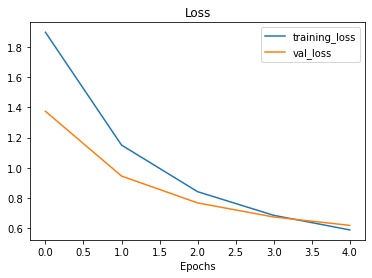

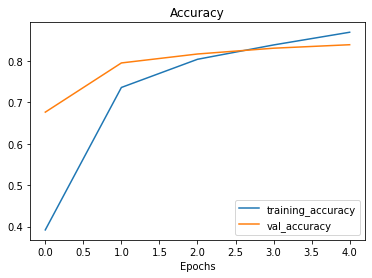

In [ ]:
plot_loss_curves(history_0)

## Getting feature vector from a trained model



In [ ]:
input_shape = (1, 4, 4, 3)

tf.random.set_seed(42)
input_tensor = tf.random.normal(input_shape)

print(input_tensor)

global_average_pooled_tensor = tf.keras.layers.GlobalAveragePooling2D()(input_tensor)

print(f"\n---------\n\n{global_average_pooled_tensor}")

tf.Tensor(
[[[[ 0.3274685  -0.8426258   0.3194337 ]
   [-1.4075519  -2.3880599  -1.0392479 ]
   [-0.5573232   0.539707    1.6994323 ]
   [ 0.28893656 -1.5066116  -0.2645474 ]]

  [[-0.59722406 -1.9171132  -0.62044144]
   [ 0.8504023  -0.40604794 -3.0258412 ]
   [ 0.9058464   0.29855987 -0.22561555]
   [-0.7616443  -1.8917141  -0.93847126]]

  [[ 0.77852213 -0.47338897  0.97772694]
   [ 0.24694404  0.20573747 -0.5256233 ]
   [ 0.32410017  0.02545409 -0.10638497]
   [-0.6369475   1.1603122   0.2507359 ]]

  [[-0.41728503  0.4012578  -1.4145443 ]
   [-0.5931857  -1.6617213   0.33567193]
   [ 0.10815629  0.23479682 -0.56668764]
   [-0.35819843  0.88698614  0.52744764]]]], shape=(1, 4, 4, 3), dtype=float32)

---------

[[-0.09368646 -0.45840448 -0.2885598 ]]


In [ ]:
tf.reduce_mean(input_tensor, axis=[1,2])

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-0.09368646, -0.45840448, -0.2885598 ]], dtype=float32)>

## Running a series of transfler learning experiments

1. `model_1` feature extraction with 1% of training data with augmentation
2. `model_2` feature extraction with 10% of data with data augmentation
3. `model_3` finetuning transfer learning on 10% of the training datat with data augmentation
4. `model_4` finetuning with 100% of training data augmented

In [ ]:
#Download

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
unzip_data("10_food_classes_1_percent.zip")

--2022-06-29 14:26:34--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 108.177.98.128, 74.125.197.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M   206MB/s    in 0.6s    

2022-06-29 14:26:35 (206 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [ ]:
train_dir_1_percent = "/content/10_food_classes_1_percent/train"
test_dir = "/content/10_food_classes_1_percent/test"

In [ ]:
walk_through_dir("/content/10_food_classes_1_percent")

There are 2 directories and 0 images in '/content/10_food_classes_1_percent'.
There are 10 directories and 0 images in '/content/10_food_classes_1_percent/test'.
There are 0 directories and 250 images in '/content/10_food_classes_1_percent/test/fried_rice'.
There are 0 directories and 250 images in '/content/10_food_classes_1_percent/test/chicken_wings'.
There are 0 directories and 250 images in '/content/10_food_classes_1_percent/test/hamburger'.
There are 0 directories and 250 images in '/content/10_food_classes_1_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '/content/10_food_classes_1_percent/test/sushi'.
There are 0 directories and 250 images in '/content/10_food_classes_1_percent/test/pizza'.
There are 0 directories and 250 images in '/content/10_food_classes_1_percent/test/ice_cream'.
There are 0 directories and 250 images in '/content/10_food_classes_1_percent/test/steak'.
There are 0 directories and 250 images in '/content/10_food_classes_1_percent/te

In [ ]:
train_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir_1_percent,
                                                                           label_mode="categorical",
                                                                           image_size=IMG_SIZE,
                                                                           batch_size=BATCH_SIZE)

Found 70 files belonging to 10 classes.


In [ ]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
  tf.keras.layers.experimental.preprocessing.RandomZoom(0.2),
  tf.keras.layers.experimental.preprocessing.RandomHeight(0.2),
  tf.keras.layers.experimental.preprocessing.RandomWidth(0.2),
], name="data_augmentation")

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random


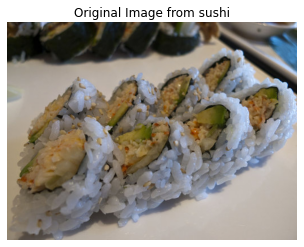

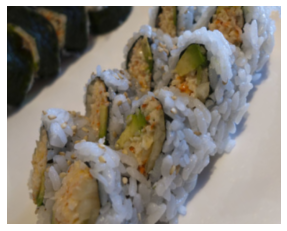

In [ ]:
target_class = random.choice(train_data_1_percent.class_names)
target_dir = train_dir_1_percent+"/"+target_class
random_image = target_dir+"/"+random.choice(os.listdir(target_dir))
img = mpimg.imread(random_image)
plt.imshow(img)
plt.title(f"Original Image from {target_class}")
plt.axis(False);

augmented_img = data_augmentation(tf.expand_dims(img, axis=0), training=True)
plt.figure()
plt.imshow(tf.squeeze(augmented_img)/255.)
plt.axis(False);

### Model 1 Feature Extraction with 1% of data

In [ ]:
input_shape = (224, 224, 3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

inputs = tf.keras.layers.Input(shape=input_shape, name="input_layer")
x = data_augmentation(inputs)
x = base_model(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
outputs = tf.keras.layers.Dense(10, activation="softmax", name="output_layer")(x)


model_1 = tf.keras.Model(inputs, outputs)
model_1.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_1 = model_1.fit(train_data_1_percent,
                        epochs=5,
                        steps_per_epoch=len(train_data_1_percent),
                        validation_data=(test_data),
                        validation_steps=int(0.25*len(test_data)),
                        callbacks=[create_tensorboard_callback("transfer_learning", "model_1")])

Saving TensorBoard log files to: transfer_learning/model_1/20220629-142640
Epoch 1/5
3/3 [==============================] - 10s 2s/step - loss: 2.3826 - accuracy: 0.1286 - val_loss: 2.2367 - val_accuracy: 0.1727
Epoch 2/5
3/3 [==============================] - 4s 2s/step - loss: 2.0911 - accuracy: 0.2571 - val_loss: 2.1209 - val_accuracy: 0.2319
Epoch 3/5
3/3 [==============================] - 3s 1s/step - loss: 1.9673 - accuracy: 0.3714 - val_loss: 2.0144 - val_accuracy: 0.2993
Epoch 4/5
3/3 [==============================] - 4s 2s/step - loss: 1.8001 - accuracy: 0.5714 - val_loss: 1.9555 - val_accuracy: 0.3191
Epoch 5/5
3/3 [==============================] - 3s 1s/step - loss: 1.6976 - accuracy: 0.5714 - val_loss: 1.8393 - val_accuracy: 0.4227


In [ ]:
results_1 = model_1.evaluate(test_data)
results_1

79/79 [==============================] - 9s 103ms/step - loss: 1.8500 - accuracy: 0.4128


[1.8500174283981323, 0.41280001401901245]

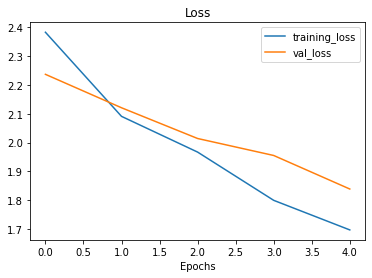

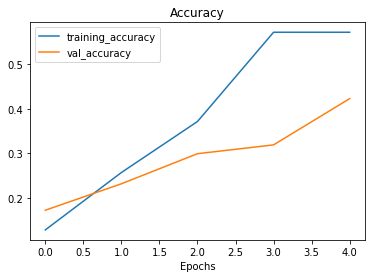

In [ ]:
plot_loss_curves(history_1)

### Model 2 - 10% with data augmentation

In [ ]:
input_shape = (224, 224, 3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

inputs = tf.keras.layers.Input(shape=input_shape, name="input_layer")
x = data_augmentation(inputs)
x = base_model(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
outputs = tf.keras.layers.Dense(10, activation="softmax", name="output_layer")(x)

model_2 = tf.keras.Model(inputs, outputs)

model_2.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#Creating a checkpoint path
checkpoint_path = "model_2_checkpoints/checkpoint.ckpt"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True,
                                                         save_best_only=True)

history_2 = model_2.fit(train_data_10_percent,
                        steps_per_epoch=len(train_data_10_percent),
                        validation_data=test_data,
                        validation_steps=len(test_data),
                        epochs=5,
                        callbacks=[create_tensorboard_callback("transfer_learning", "model_2"), checkpoint_callback])

Saving TensorBoard log files to: transfer_learning/model_2/20220629-142720
Epoch 1/5
24/24 [==============================] - 22s 668ms/step - loss: 2.0255 - accuracy: 0.3453 - val_loss: 1.5196 - val_accuracy: 0.6324
Epoch 2/5
24/24 [==============================] - 19s 777ms/step - loss: 1.3687 - accuracy: 0.6773 - val_loss: 1.0601 - val_accuracy: 0.7632
Epoch 3/5
24/24 [==============================] - 14s 583ms/step - loss: 1.0629 - accuracy: 0.7373 - val_loss: 0.8661 - val_accuracy: 0.7856
Epoch 4/5
24/24 [==============================] - 15s 602ms/step - loss: 0.8999 - accuracy: 0.7813 - val_loss: 0.7556 - val_accuracy: 0.8020
Epoch 5/5
24/24 [==============================] - 13s 529ms/step - loss: 0.7933 - accuracy: 0.8040 - val_loss: 0.6872 - val_accuracy: 0.8136


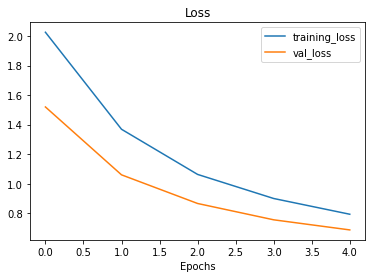

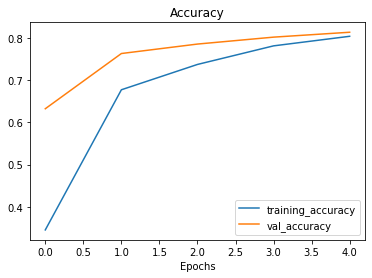

In [ ]:
plot_loss_curves(history_2)

In [ ]:
model_2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, None, None, 3)    0         
 al)                                                             
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-traina

In [ ]:
model_2.evaluate(test_data)

79/79 [==============================] - 7s 81ms/step - loss: 0.6872 - accuracy: 0.8136


[0.6871697902679443, 0.8136000037193298]

In [ ]:
model_0.evaluate(test_data)

79/79 [==============================] - 7s 72ms/step - loss: 0.6168 - accuracy: 0.8392


[0.6168113350868225, 0.8392000198364258]

#### Loding in checkpointed weights

In [ ]:
model_2.load_weights(checkpoint_path)

In [ ]:
model_2.evaluate(test_data)

79/79 [==============================] - 6s 72ms/step - loss: 0.6872 - accuracy: 0.8136


[0.6871696710586548, 0.8136000037193298]

### Model 3 - Fine tuning on 10%

In [ ]:
model_2.layers

In [ ]:
for layer in model_2.layers:
  print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7f870bf71a90> True
<keras.engine.sequential.Sequential object at 0x7f870fd34bd0> True
<keras.engine.functional.Functional object at 0x7f870ba4b490> False
<keras.layers.pooling.GlobalAveragePooling2D object at 0x7f870bf692d0> True
<keras.layers.core.dense.Dense object at 0x7f870bb2de50> True


In [ ]:
for i, layer in enumerate(model_2.layers[2].layers):
  print(i, layer.name, layer.trainable)

0 input_3 False
1 rescaling_2 False
2 normalization_2 False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_resha

In [ ]:
base_model.trainable = True

#Freeze all layers except for last 10

for layer in base_model.layers[:-10]:
  layer.trainable = False

model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                metrics=["accuracy"])

In [ ]:
for i, layer in enumerate(model_2.layers[2].layers):
  print(i, layer.name, layer.trainable)

0 input_3 False
1 rescaling_2 False
2 normalization_2 False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_resha

In [ ]:
len(model_2.trainable_variables)

12

In [ ]:
history_3 = model_2.fit(train_data_10_percent,
                        epochs=10,
                        steps_per_epoch=len(train_data_10_percent),
                        validation_data=test_data,
                        validation_steps=(0.25 * len(test_data)),
                        initial_epoch = history_2.epoch[-1],
                        callbacks=[create_tensorboard_callback("transfer_learning", "10_percent_fine_tune_last_10")])

Saving TensorBoard log files to: transfer_learning/10_percent_fine_tune_last_10/20220629-142918
Epoch 5/10
24/24 [==============================] - 22s 597ms/step - loss: 0.7057 - accuracy: 0.8173 - val_loss: 0.5632 - val_accuracy: 0.8062
Epoch 6/10
24/24 [==============================] - 9s 341ms/step - loss: 0.5414 - accuracy: 0.8267 - val_loss: 0.5290 - val_accuracy: 0.8266
Epoch 7/10
24/24 [==============================] - 11s 408ms/step - loss: 0.4849 - accuracy: 0.8547 - val_loss: 0.5471 - val_accuracy: 0.8172
Epoch 8/10
24/24 [==============================] - 10s 374ms/step - loss: 0.4401 - accuracy: 0.8587 - val_loss: 0.5297 - val_accuracy: 0.8219
Epoch 9/10
24/24 [==============================] - 9s 377ms/step - loss: 0.4113 - accuracy: 0.8720 - val_loss: 0.5453 - val_accuracy: 0.8266
Epoch 10/10
24/24 [==============================] - 9s 367ms/step - loss: 0.3501 - accuracy: 0.8867 - val_loss: 0.5500 - val_accuracy: 0.8156


In [ ]:
model_2.evaluate(test_data)

79/79 [==============================] - 7s 85ms/step - loss: 0.5064 - accuracy: 0.8248


[0.5063843727111816, 0.8248000144958496]

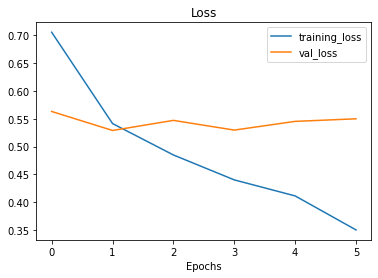

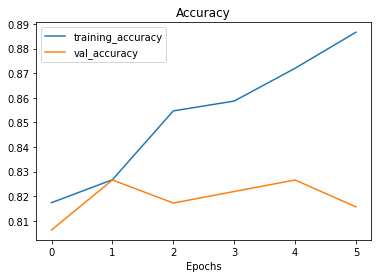

In [ ]:
plot_loss_curves(history_3)

### Model 4 Fine tuning an existing layer on all the data

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
unzip_data("10_food_classes_all_data.zip")

--2022-06-29 14:30:39--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.199.128, 74.125.20.128, 74.125.197.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.199.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   278MB/s    in 1.8s    

2022-06-29 14:30:41 (278 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
train_dir_all_data = "10_food_classes_all_data/train"
walk_through_dir("10_food_classes_all_data")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 

In [ ]:
train_data_all = tf.keras.preprocessing.image_dataset_from_directory(train_dir_all_data,
                                                                     image_size = IMG_SIZE,
                                                                     batch_size=BATCH_SIZE,
                                                                     label_mode="categorical")

Found 7500 files belonging to 10 classes.


In [ ]:
model_2.evaluate(train_data_all)

235/235 [==============================] - 19s 78ms/step - loss: 0.6325 - accuracy: 0.7936


[0.632500410079956, 0.7936000227928162]

In [ ]:
model_2.load_weights(checkpoint_path)

In [ ]:
model_2.evaluate(train_data_all)

235/235 [==============================] - 18s 73ms/step - loss: 0.7798 - accuracy: 0.7785


[0.7798457145690918, 0.7785333395004272]

In [ ]:
for layer_number, layer in enumerate(model_2.layers[2].layers):
  print(layer_number, layer.name, layer.trainable)

0 input_3 False
1 rescaling_2 False
2 normalization_2 False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_resha

In [ ]:
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                metrics=["accuracy"])

In [ ]:
model_2.optimizer.learning_rate

<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=1e-04>

In [ ]:
history_4 = model_2.fit(train_data_all,
                        validation_data=test_data,
                        validation_steps=int(0.25*(len(test_data))),
                        epochs=10,
                        initial_epoch = history_2.epoch[-1],
                        callbacks=[create_tensorboard_callback("transfer_learning", "model_4")])

Saving TensorBoard log files to: transfer_learning/model_4/20220629-145213
Epoch 5/10
235/235 [==============================] - 47s 171ms/step - loss: 0.7306 - accuracy: 0.7683 - val_loss: 0.4186 - val_accuracy: 0.8618
Epoch 6/10
235/235 [==============================] - 36s 153ms/step - loss: 0.5804 - accuracy: 0.8140 - val_loss: 0.3961 - val_accuracy: 0.8618
Epoch 7/10
235/235 [==============================] - 34s 145ms/step - loss: 0.5194 - accuracy: 0.8339 - val_loss: 0.3726 - val_accuracy: 0.8618
Epoch 8/10
235/235 [==============================] - 32s 134ms/step - loss: 0.4764 - accuracy: 0.8461 - val_loss: 0.3555 - val_accuracy: 0.8816
Epoch 9/10
235/235 [==============================] - 32s 132ms/step - loss: 0.4356 - accuracy: 0.8608 - val_loss: 0.3541 - val_accuracy: 0.8734
Epoch 10/10
235/235 [==============================] - 34s 143ms/step - loss: 0.4108 - accuracy: 0.8700 - val_loss: 0.4048 - val_accuracy: 0.8536


In [ ]:
! tensorboard dev upload --logdir "/content/transfer_learning" \
--name "First Upload" --one_shot


***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

/content/transfer_learning

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=373649185512-8v619h5kft38l4456nm2dj4ubeqsrvh6.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&state=tXJsLA25aQzjuCHrHz1hD6m27Jvdfo&prompt=consent&access

In [ ]:
!tensorboard dev list

https://tensorboard.dev/experiment/N4C4EocQQGaV7l0Fg1iVCw/
	Name                 First Upload
	Description          [No Description]
	Id                   N4C4EocQQGaV7l0Fg1iVCw
	Created              2022-06-29 15:00:09 (2 minutes ago)
	Updated              2022-06-29 15:00:15 (2 minutes ago)
	Runs                 12
	Tags                 5
	Scalars              186
	Tensor bytes         0
	Binary object bytes  5187144
Total: 1 experiment(s)
